<a href="https://colab.research.google.com/github/kausnz/ml_zoomcamp_homework/blob/main/lessons/ml_zoomcamp_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%autosave 1

Autosaving every 1 seconds


In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

data='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data

--2022-09-30 19:05:29--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.04s   

2022-09-30 19:05:29 (39.9 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [33]:
# clean up column names and string values in the dataframe

df = pd.read_csv('data.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_cols = df.dtypes[df.dtypes == 'object'].index
for c in string_cols:
    df[c] = df[c].str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [34]:
for c in df.columns:
    print("{} : {}".format(c, df[c].dtype))
    print(df[c].unique()[:5])
    print(df[c].nunique())
    print('')


make : object
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model : object
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year : int64
[2011 2012 2013 1992 1993]
28

engine_fuel_type : object
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp : float64
[335. 300. 230. 320. 172.]
356

engine_cylinders : float64
[ 6.  4.  5.  8. 12.]
9

transmission_type : object
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels : object
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors : float64
[ 2.  4.  3. nan]
3

market_category : object
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size : object
['compact' 'midsize' 'large']
3

vehicle_style : object
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg : int64
[26 28 2

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

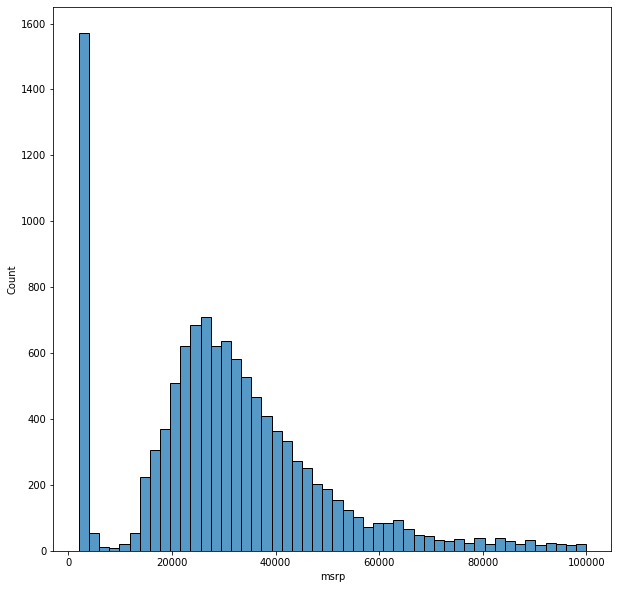

In [36]:
plt.figure(figsize=(10,10))
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

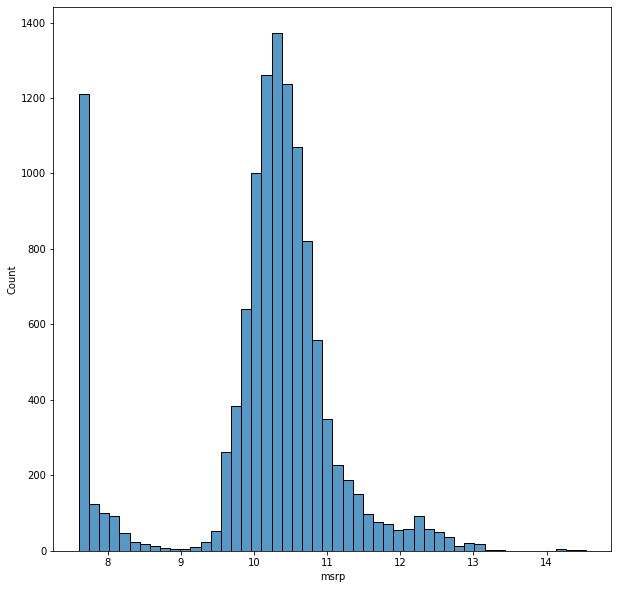

In [37]:
# to get rid of the long tail of the distribution
msrp_logs = np.log1p(df.msrp)
plt.figure(figsize=(10,10))
sns.histplot(msrp_logs, bins=50)

In [38]:
# to have an idea about which columns contain missing values and how many
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [39]:
# Splitting the dataset to train, validation and test
n  = len(df) 
n_test = int(n * 0.2)
n_validation = int(n * 0.2)
n_train = n - n_test - n_validation
n, n_train, n_validation, n_test, n_train + n_validation + n_test



(11914, 7150, 2382, 2382, 11914)

In [40]:
# Shuffle the dataset
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

master_df = df.copy()
df_train = df.iloc[idx[:n_train]]
df_validation = df.iloc[idx[n_train : n_train + n_validation]]
df_test = df.iloc[idx[n_train + n_validation : ]]

len(df_train), len(df_validation), len(df_test)

df_train = df_train.reset_index(drop=True)
df_validation = df_validation.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.msrp.values)
y_validation = np.log1p(df_validation.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_validation['msrp']
del df_test['msrp']

y_train


array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

# Linear Regression

$\large g(X) \approx y \\\\$
$\large g(x_i) \approx y_i \\\\$ 
$\large x_i = (x_{i1}, x_{i2},  \cdots, x_{in}) $  This is the feature matrix. Each x is a feature of the given car i. $\\$
$\large g(x_{i1}, x_{i2},  \cdots, x_{in}) \approx y_i $

$\large g(x_i) = w_0 + w_1x_{i1} + w_2x_{i2} + w_3x_{i3} \\$
$w_0$ is known as the bias term
$\\\\ \large g(x_i) = w_0 + \sum\limits_{j=1}^{n} {w_jx_{ij}} \\ $
Even further simplified by bringing w0 in to the summation. For this we make sure xi vector has 1 as its first element, and wi vector has w0 as its first.
$\\\\ \large g(x_i) = \sum\limits_{j=1}^{n} {w_jx_{ij}} \\ $

In [41]:
w = np.array([0.01, 0.04, 0.002])
w0 = [7.17]
w = np.concatenate([w0, w])
w

xi = np.array([453, 11, 86])
x0 = [1]
xi = np.concatenate([x0, xi])

xi.dot(w)

12.312

In [42]:
# Turning what was done above for a single observation (vector) into to a matrix.

wi = np.array([7.17, 0.01, 0.04, 0.002])
x1 =  [1, 148, 24, 1385]
x2 =  [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]
xi = np.array([x1, x2, x10])

xi.shape
wi.shape
y = np.matmul(xi,wi)
y

array([12.38 , 13.552, 12.312])

$$ g(X) = X \cdot w \approx y $$
$$ X \cdot w = y $$
$$X^T \cdot X \cdot w = X^T \cdot y $$
$$(X^T \cdot X)^{-1} \cdot X^T \cdot X \cdot w = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$
$$ w = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

In [43]:
X = np.array([
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
])

In [44]:
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])
list(X)

[array([1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03]),
 array([1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03]),
 array([  1., 453.,  11.,  86.]),
 array([  1., 158.,  24., 185.]),
 array([  1., 172.,  25., 201.]),
 array([  1., 413.,  11.,  86.]),
 array([  1.,  38.,  54., 185.]),
 array([  1., 142.,  25., 431.]),
 array([  1., 453.,  31.,  86.])]

In [45]:
# Calculate the Gram matrix
XTX = X.T.dot(X)
X.shape
XTX.shape
# Inverse the Gram matrix
XTX_inv = np.linalg.inv(XTX)
y = np.array([10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000])
w_full = XTX_inv.dot(X.T).dot(y)
w0 = w_full[0]
w = w_full[1:]
w0, w


(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [46]:
# Putting what we have built in a function

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # Create Gram matrix
    XTX = X.T.dot(X)
    
    # Inverse the Gram matrix
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [47]:
# Test the function

# features
X = np.array([
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
])
# target
y = np.array([10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000])

# drum roll...
train_linear_regression(X, y)

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

# Appying the regression function we developed on the real training dataset

In [48]:
df_train.dtypes[df_train.dtypes != 'object']

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].values

df_train[base].isnull().sum()
X_train = df_train[base].fillna(0)

y_train
w0, w = train_linear_regression(X_train, y_train)

# Now we go the weights to make the predictions. So let's apply these w values to g(X) and get the y values for the training dataset
# g(X) = w0 + X (dot) w
y_pred = w0 + X_train.dot(w)

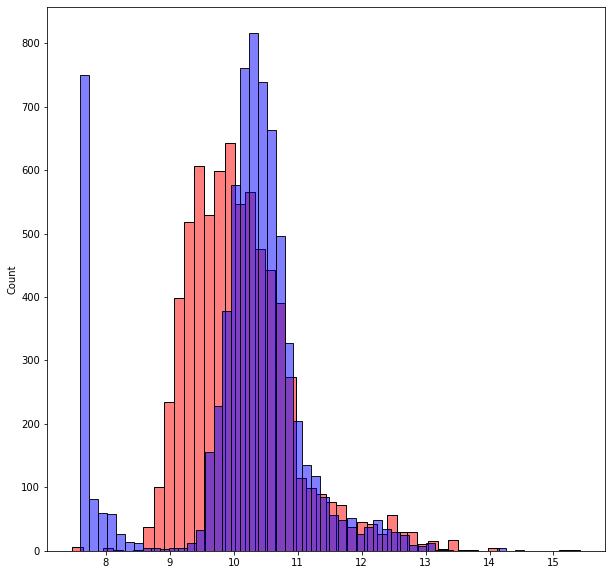

In [49]:
# plot histogram for the predictions
plt.figure(figsize=(10,10))
sns.histplot(y_pred, color='red', bins=50, alpha=0.5)
sns.histplot(y_train, color='blue', bins=50, alpha=0.5)


### Root Mean Squared Error (RMSE)

$RMSE = \sqrt{ \frac{1}{m} \sum {(g(x_i) - y_i)^2}}\\$
$g(x_i)$ is the prediction, $y_i$ is the actual, $m$ is the number of observations in the dataset (i.e. cars)

* In the previous lesson we found out our predictions were a bit off from the actual target values in the training dataset. We need a way to quantify how good or bad the model is. This is where RMSE can be of help.
* Root Mean Squared Error (RMSE) is a way to evaluate regression models. It measures the error associated with the model being evaluated. This numerical figure then can be used to compare the models, enabling us to choose the one that gives the best predictions.

In [50]:
# Function to calculate RMSE

def get_rmse(y_pred, y):
    se = np.square( y_pred - y)
    mse = se.mean()
    return np.sqrt(mse)

rmse = get_rmse(y_pred, y_train)
rmse

0.7554192603920132

### Feature Engineering

In [51]:
# Steps:
# 1. train the model using train data. Find w0 bias and w vector
# 2. Run this model with validation data to find the y_pred
# 3. Calculate RMSE for y_actual and y_pred.

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0)
w0, w = train_linear_regression(X_train, y_train)

X_validation = df_validation[base].fillna(0)

y_pred = w0 + X_validation.dot(w)
get_rmse(y_pred, y_validation)

0.761653099130156

In [52]:
# Adding Age to the feature matrix. This imporves out model. See the RMSE and plots below.

def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] + ['age']
    return df[base].fillna(0)

X_train = prepare_X(df_train)
X_train
w0, w = train_linear_regression(X_train, y_train) # <---- this is training

X_validation = prepare_X(df_validation)

y_pred = w0 + X_validation.dot(w)
get_rmse(y_pred, y_validation)

0.5172055461058299

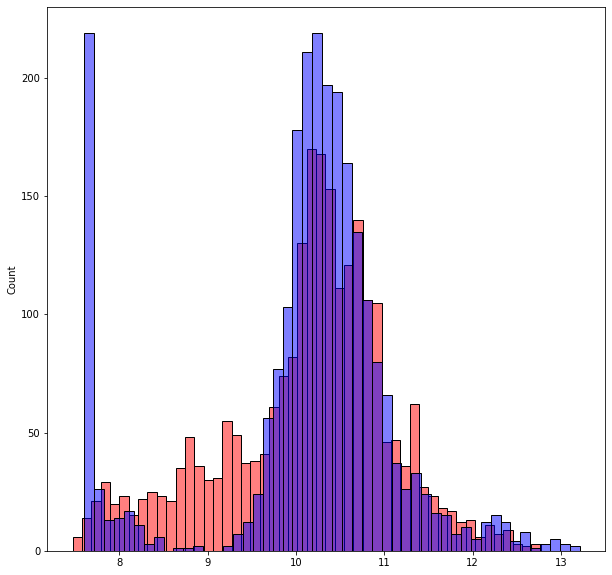

In [53]:
# plot histogram for the predictions
plt.figure(figsize=(10,10))
sns.histplot(y_pred, color='red', bins=50, alpha=0.5)
sns.histplot(y_validation, color='blue', bins=50, alpha=0.5)

### Categorical Variables

In [54]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [55]:
df = df_train.copy()
for i in (2, 3, 4):
    df['number_of_doors_%s' % i] = (df.number_of_doors == i).astype('int')

df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
number_of_doors_2      int64
number_of_doors_3      int64
number_of_doors_4      int64
dtype: object

In [56]:
# Adding all the rest of the categorical features.

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
cat_columns = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

def prepare_X(df):
    df = df.copy()
    features = base.copy()
    long_categories = {}
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for i in (2, 3, 4):
        df['number_of_doors_%s' % i] = (df.number_of_doors == i).astype('int')
        features.append('number_of_doors_%s' % i)
    
    # create a dict of rest of the categorigal vars and their top 5 values
    for c in cat_columns:
        long_categories[c] = list(master_df[c].value_counts().head().index)

    # traverse the dict to dynamically create the columns and populate their values
    for c, vals in long_categories.items():
        for v in vals:
            df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))
#     print((len(features),features))
    return df[features].fillna(0).values

X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train) # <---- this is training

X_validation = prepare_X(df_validation)
y_pred = w0 + X_validation.dot(w)
get_rmse(y_pred, y_validation)
# w0, w

85.39382195965916

In [57]:
# Regularised regression function

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # Create Gram matrix
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    # Inverse the Gram matrix
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001) #<---- this is training

X_validation = prepare_X(df_validation)
y_pred = w0 + X_validation.dot(w)
get_rmse(y_pred, y_validation)

0.456517508494148

In [58]:
# Finding the best regularisation parameter

r_candidates = [0.0, 0.00001, 0.0001, 0.001, 0.1, 10]

for r in r_candidates:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r) #<---- this is training

    X_validation = prepare_X(df_validation)
    y_pred = w0 + X_validation.dot(w)
    print((r, get_rmse(y_pred, y_validation)))


(0.0, 85.39382195965916)
(1e-05, 0.45651699218840697)
(0.0001, 0.4565170637682569)
(0.001, 0.456517508494148)
(0.1, 0.45656927630296296)
(10, 0.4701456932099694)


### Use the model
Now we know 0.001 is a good number for `r`. Let's apply the model on train + validation datasets, considering them as the full_train dataset to tain the model.

In [59]:
df_train_full = pd.concat([df_train, df_validation])
df_train_full = df_train_full.reset_index(drop=True)

y_train_full = np.concatenate([y_train, y_validation])

X_train_full = prepare_X(df_train_full)
w0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001) #<---- this is training

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
get_rmse(y_pred, y_test)

0.4517749308921107

In [60]:
# Now we have out Final Model ready (with w0 and w derived from training the model). Let's apply it to some cars individually from the dataset and see what the model predicts.

car = df_test.iloc[20].to_dict()
df_small = pd.DataFrame([car])
df_small
X_small = prepare_X(df_small)
X_small
w.shape
y_pred = w0 + X_small.dot(w)
pred = np.expm1(y_pred[0]) # prediction in monetary value

actual = np.expm1(y_test[20]) # actual price

print("actual={}, prediction={}".format(actual, pred))

actual=35000.00000000001, prediction=34983.196074942105
